import Modules

In [1]:
import sys
import os
import glob
import random
import time

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid import ImageGrid

plt.style.use("dark_background")

C:\Users\laboratory\anaconda3\envs\pythonProject\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  if sys.path[0] == '':


Global Variables

In [2]:
# Path to all data
DATA_PATH = "lgg-mri-segmentation/kaggle_3m/"

# File path line length images for later sorting
BASE_LEN = 89 # len(/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_ <-!!!43.tif)
END_IMG_LEN = 4 # len(/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->.tif)
END_MASK_LEN = 9 # (/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->_mask.tif)

# img size
IMG_SIZE = 512

Create A Dataframe

In [3]:
# Raw data
data_map = []
for sub_dir_path in glob.glob(DATA_PATH+"*"):
    if os.path.isdir(sub_dir_path):
        dirname = sub_dir_path.split("/")[-1]
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + "/" + filename
            data_map.extend([dirname, image_path])
    else:
        print("This is not a dir:", sub_dir_path)


df = pd.DataFrame({"dirname" : data_map[::2],
                  "path" : data_map[1::2]})
df.head()

This is not a dir: lgg-mri-segmentation/kaggle_3m\data.csv
This is not a dir: lgg-mri-segmentation/kaggle_3m\README.md


,dirname,path
0,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
1,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
2,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
3,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
4,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...


In [4]:
# Masks/Not masks
df_imgs = df[~df['path'].str.contains("mask")]
df_masks = df[df['path'].str.contains("mask")]
#"""
# Data sorting
imgs = sorted(df_imgs["path"].values, key=lambda x : x[BASE_LEN:-END_IMG_LEN])
masks = sorted(df_masks["path"].values, key=lambda x : x[BASE_LEN:-END_MASK_LEN])
"""
# Data sorting
imgs = sorted(df_imgs["path"].values, key=lambda x : int(x[BASE_LEN:-END_IMG_LEN]))
masks = sorted(df_masks["path"].values, key=lambda x : int(x[BASE_LEN:-END_MASK_LEN]))
"""
# Sorting check
idx = random.randint(0, len(imgs)-1)
print("Path to the Image:", imgs[idx], "\nPath to the Mask:", masks[idx])

Path to the Image: lgg-mri-segmentation/kaggle_3m\TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_38.tif 
Path to the Mask: lgg-mri-segmentation/kaggle_3m\TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_39_mask.tif


In [5]:
print(df_imgs.index)

Int64Index([   0,    1,    3,    5,    7,    9,   11,   13,   15,   17,
            ...
            7837, 7839, 7841, 7843, 7845, 7847, 7849, 7851, 7853, 7856],
           dtype='int64', length=3929)


In [6]:
# Final dataframe
df = pd.DataFrame({"patient": df_imgs.dirname.values,
                       "image_path": imgs,
                   "mask_path": masks})


# Adding A/B column for diagnosis
def positiv_negativ_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 : return 1
    else: return 0

df["diagnosis"] = df["mask_path"].apply(lambda m: positiv_negativ_diagnosis(m))
df

,patient,image_path,mask_path,diagnosis
0,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,0
1,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
2,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
3,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
4,kaggle_3m\TCGA_CS_4941_19960909,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
...,...,...,...,...
3924,kaggle_3m\TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,0
3925,kaggle_3m\TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,0
3926,kaggle_3m\TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,0
3927,kaggle_3m\TCGA_HT_A61B_19991127,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m\TCGA_HT_A61B_19...,0


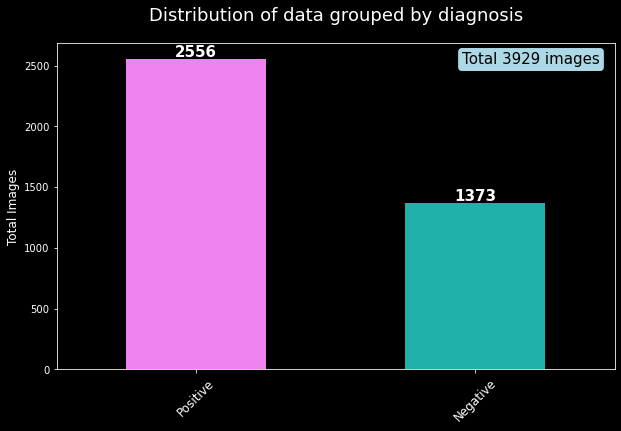

In [7]:
# Plot
ax = df.diagnosis.value_counts().plot(kind='bar',
                                      stacked=True,
                                      figsize=(10, 6),
                                     color=["violet", "lightseagreen"])


ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12);
ax.set_ylabel('Total Images', fontsize = 12)
ax.set_title("Distribution of data grouped by diagnosis",fontsize = 18, y=1.05)

# Annotate
for i, rows in enumerate(df.diagnosis.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12),
                rotation=0, color="white",
                ha="center", verticalalignment='bottom',
                fontsize=15, fontweight="bold")

ax.text(1.2, 2550, f"Total {len(df)} images", size=15,
        color="black",
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                   )
         );

Distribution of Data grouped by patient and diagnosis

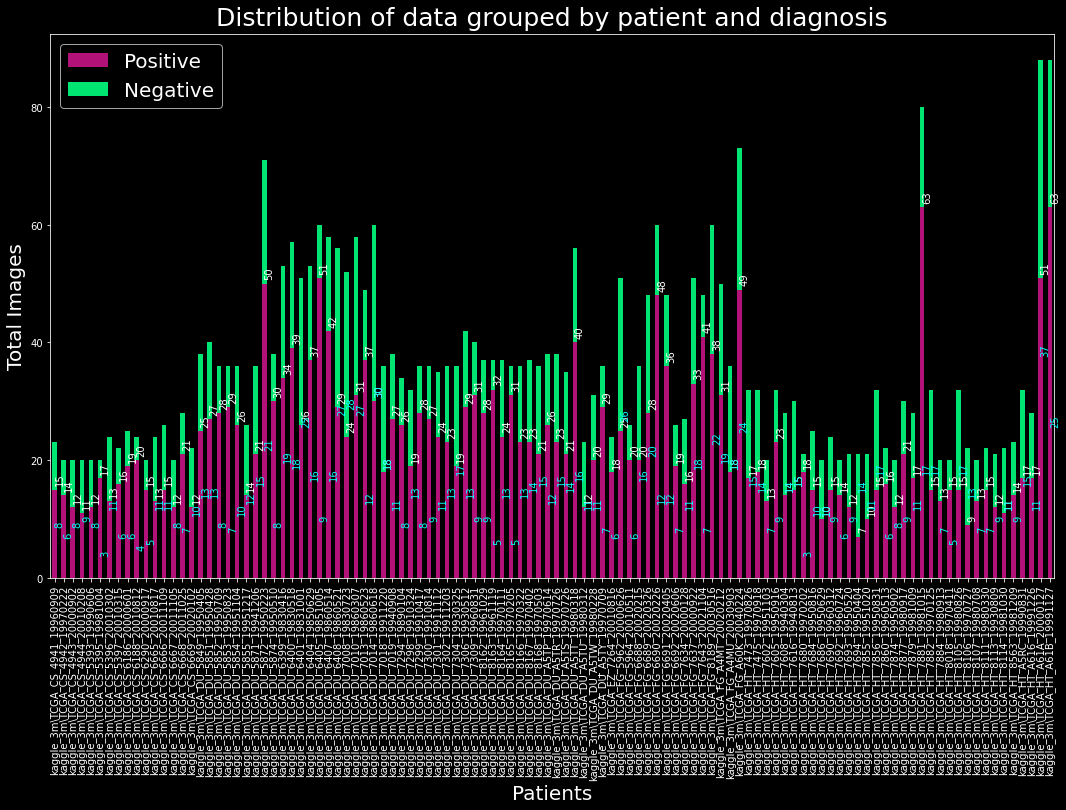

In [8]:
# Data
patients_by_diagnosis = df.groupby(['patient', 'diagnosis'])['diagnosis'].size().unstack().fillna(0)
patients_by_diagnosis.columns = ["Positive", "Negative"]

# Plot
ax = patients_by_diagnosis.plot(kind='bar',stacked=True,
                                figsize=(18, 10),
                                color=["mediumvioletred", "springgreen"],
                                alpha=0.9)
ax.legend(fontsize=20);
ax.set_xlabel('Patients',fontsize = 20)
ax.set_ylabel('Total Images', fontsize = 20)
ax.set_title("Distribution of data grouped by patient and diagnosis",fontsize = 25, y=1.005)

# Annotations
for i, rows in enumerate(patients_by_diagnosis.values):
    plt.annotate(int(rows[0]), xy=(i, rows[0]+1), rotation=90, color="white")
    plt.annotate(int(rows[1]), xy=(i, rows[1]+1), rotation=90, color="aqua");

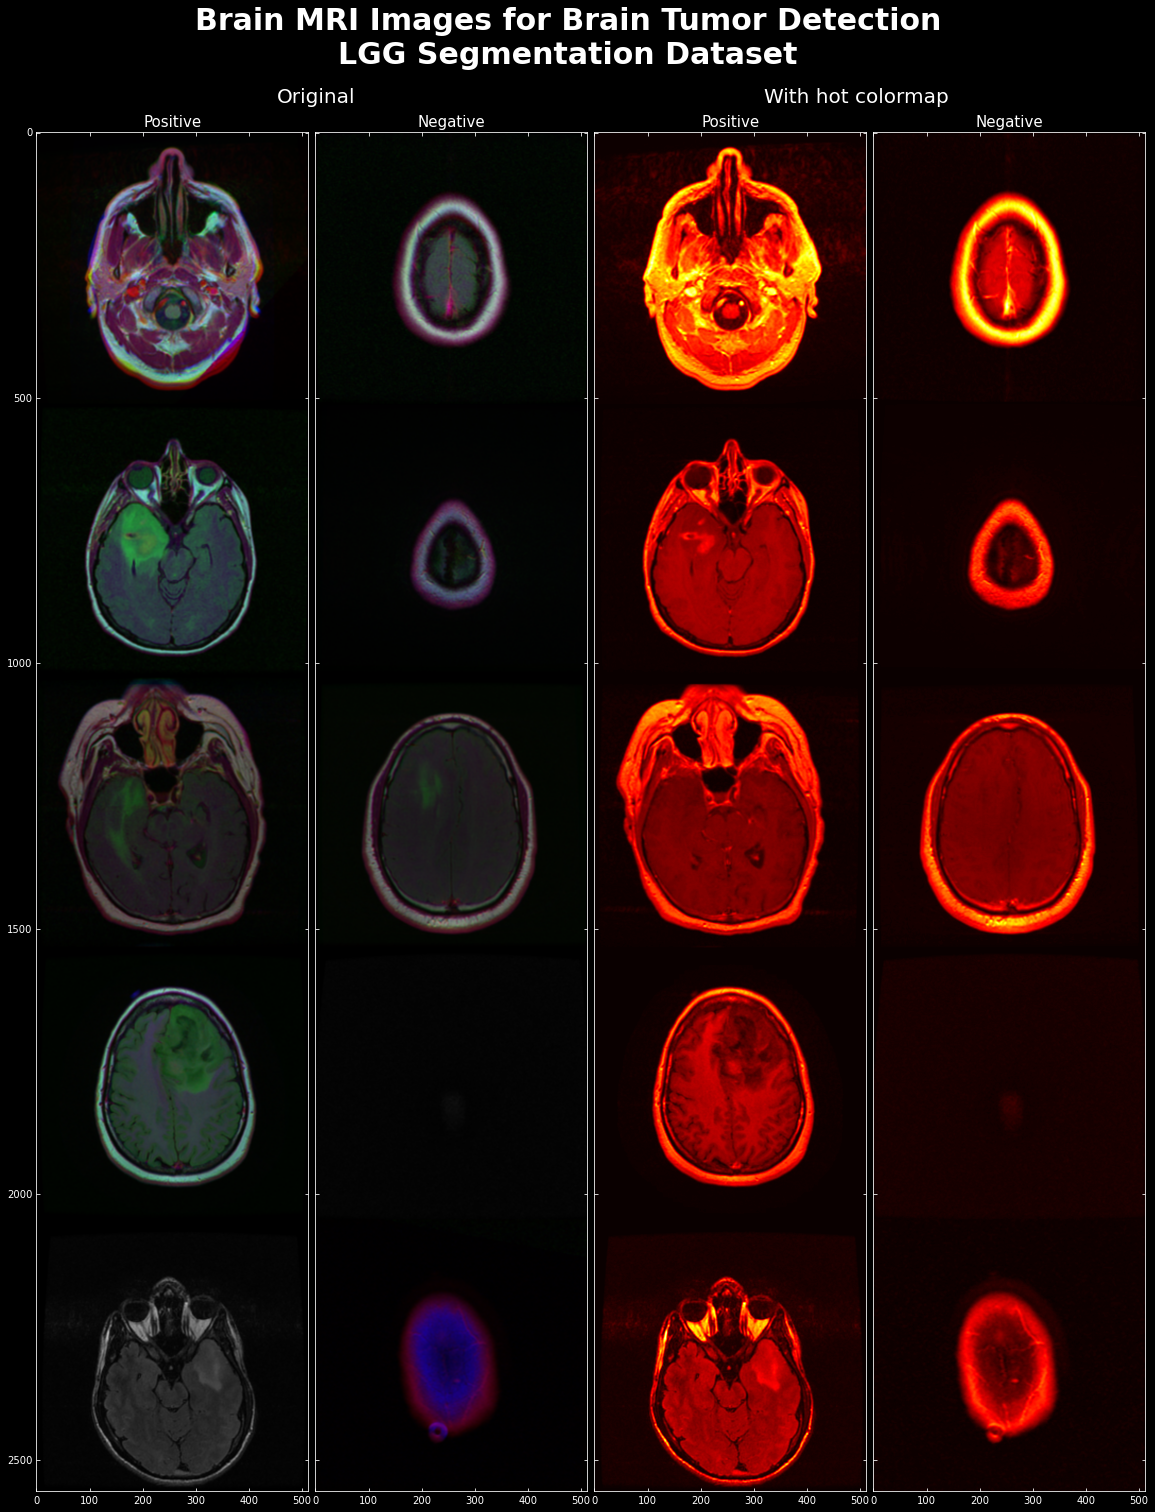

In [9]:
# Data
sample_yes_df = df[df["diagnosis"] == 1].sample(5).image_path.values
sample_no_df = df[df["diagnosis"] == 0].sample(5).image_path.values

sample_imgs = []
for i, (yes, no) in enumerate(zip(sample_yes_df, sample_no_df)):
    yes = cv2.resize(cv2.imread(yes), (IMG_SIZE, IMG_SIZE))
    no = cv2.resize(cv2.imread(no), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([yes, no])


sample_yes_arr = np.vstack(np.array(sample_imgs[::2]))
sample_no_arr = np.vstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


grid[0].imshow(sample_yes_arr)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_no_arr)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")

grid[2].imshow(sample_yes_arr[:,:,0], cmap="hot")
grid[2].set_title("Positive", fontsize=15)
grid[2].axis("off")
grid[3].imshow(sample_no_arr[:,:,0], cmap="hot")
grid[3].set_title("Negative", fontsize=15)
grid[3].axis("off")#set_title("No", fontsize=15)

# annotations
plt.figtext(0.36,0.90,"Original", va="center", ha="center", size=20)
plt.figtext(0.66,0.90,"With hot colormap", va="center", ha="center", size=20)
plt.suptitle("Brain MRI Images for Brain Tumor Detection\nLGG Segmentation Dataset", y=.95, fontsize=30, weight="bold")

# save and show
plt.savefig("dataset.png", bbox_inches='tight', pad_inches=0.2, transparent=True)
plt.show()